
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/limingwu8/Predictive-Maintenance/master/dataset/csv/sampled/sample_1_hour/MAIN_FILTER_OIL_TEMP.csv')

In [3]:
df.head()

,time,value
0,2017-05-10 18:00:00,128.781799
1,2017-05-10 19:00:00,128.781799
2,2017-05-10 20:00:00,129.741837
3,2017-05-10 21:00:00,129.741837
4,2017-05-10 22:00:00,129.741837


In [4]:
## Cleaning up the data
df.columns=["Time","SensorValue"]
df.head()

,Time,SensorValue
0,2017-05-10 18:00:00,128.781799
1,2017-05-10 19:00:00,128.781799
2,2017-05-10 20:00:00,129.741837
3,2017-05-10 21:00:00,129.741837
4,2017-05-10 22:00:00,129.741837


In [5]:
# Convert Month into Datetime
df['Time']=pd.to_datetime(df['Time'])

In [6]:
df.head()

,Time,SensorValue
0,2017-05-10 18:00:00,128.781799
1,2017-05-10 19:00:00,128.781799
2,2017-05-10 20:00:00,129.741837
3,2017-05-10 21:00:00,129.741837
4,2017-05-10 22:00:00,129.741837


In [7]:
df.set_index('Time',inplace=True)

In [8]:
df.head()

,SensorValue
Time,
2017-05-10 18:00:00,128.781799
2017-05-10 19:00:00,128.781799
2017-05-10 20:00:00,129.741837
2017-05-10 21:00:00,129.741837
2017-05-10 22:00:00,129.741837


In [9]:
df.describe()

,SensorValue
count,4899.000000
mean,128.738183
std,10.007444
min,14.556307
25%,121.853928
50%,129.417496
75%,136.403732
max,153.522324


## Step 2: Visualize the Data

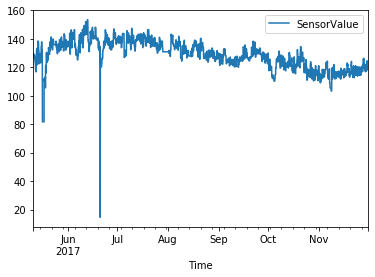

In [10]:
df.plot()

In [11]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['SensorValue'])

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(SensorValue):
    result=adfuller(SensorValue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
adfuller_test(df['SensorValue'])

ADF Test Statistic : -4.248950825624141
p-value : 0.0005438613866155446
#Lags Used : 18
Number of Observations Used : 4880
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [22]:
#umesh comment: didnot perform this step as p value in the earlier step was less than .05 and said it was stationary
#df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [212]:
#umesh comment: didnot perform this step as p value in the earlier step was less than .05 and said it was stationary
#df['Sales'].shift(1)

Month
1964-01-01        NaN
1964-02-01     2815.0
1964-03-01     2672.0
1964-04-01     2755.0
1964-05-01     2721.0
1964-06-01     2946.0
1964-07-01     3036.0
1964-08-01     2282.0
1964-09-01     2212.0
1964-10-01     2922.0
1964-11-01     4301.0
1964-12-01     5764.0
1965-01-01     7312.0
1965-02-01     2541.0
1965-03-01     2475.0
1965-04-01     3031.0
1965-05-01     3266.0
1965-06-01     3776.0
1965-07-01     3230.0
1965-08-01     3028.0
1965-09-01     1759.0
1965-10-01     3595.0
1965-11-01     4474.0
1965-12-01     6838.0
1966-01-01     8357.0
1966-02-01     3113.0
1966-03-01     3006.0
1966-04-01     4047.0
1966-05-01     3523.0
1966-06-01     3937.0
               ...   
1970-04-01     3370.0
1970-05-01     3740.0
1970-06-01     2927.0
1970-07-01     3986.0
1970-08-01     4217.0
1970-09-01     1738.0
1970-10-01     5221.0
1970-11-01     6424.0
1970-12-01     9842.0
1971-01-01    13076.0
1971-02-01     3934.0
1971-03-01     3162.0
1971-04-01     4286.0
1971-05-01     4676.0
1971

In [188]:
#umesh comment: didnot perform this step as p value in the earlier step was less than .05 and said it was stationary
#df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [15]:
#umesh comment: didnot perform this step as p value in the earlier step was less than .05 and said it was stationary
## Again test dickey fuller test
#adfuller_test(df['Seasonal First Difference'].dropna())

In [16]:
#umesh comment: didnot perform this step as p value in the earlier step was less than .05 and said it was stationary
#df['Seasonal First Difference'].plot()

## Auto Regressive Model
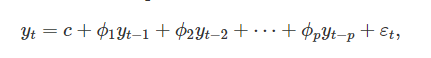

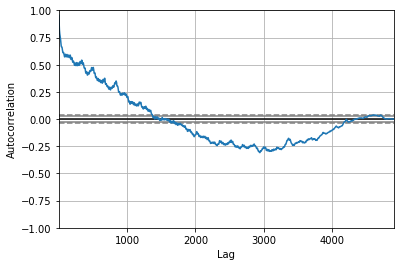

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['SensorValue'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

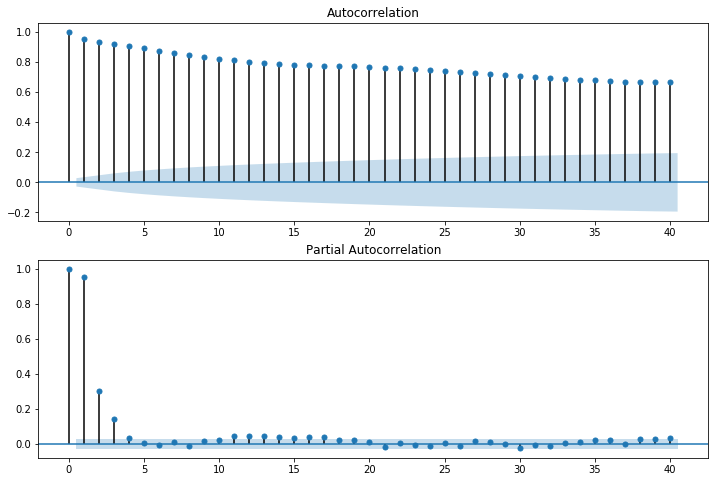

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['SensorValue'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['SensorValue'],lags=40,ax=ax2)

In [23]:
# For non-seasonal data
#p=3, d=0, q=0 or 1(was not sure of this)
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df['SensorValue'],order=(3,0,3))
model_fit=model.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            SensorValue   No. Observations:                 4899
Model:                     ARMA(3, 3)   Log Likelihood              -12085.860
Method:                       css-mle   S.D. of innovations              2.851
Date:                Fri, 25 Jun 2021   AIC                          24187.719
Time:                        09:22:22   BIC                          24239.694
Sample:                    05-10-2017   HQIC                         24205.954
                         - 11-30-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               128.6684      1.488     86.465      0.000     125.752     131.585
ar.L1.SensorValue     0.8290      0.555      1.494      0.135      -0.258       1.916
ar.L2.SensorValue    -0.1223      0.531     -0.230      0.818      -1.163       0.918
ar.L3.SensorValue     0.2687      0.774      0.347      0.728      -1.248       1.785
ma.L1.SensorValue    -0.2109      0.555     -0.380      0.704      -1.299       0.877
ma.L2.SensorValue     0.1904      0.655      0.291      0.771      -1.093       1.474
ma.L3.SensorValue    -0.0715      0.306     -0.233      0.815      -0.672       0.529
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0175           -0.0000j            1.0175           -0.0000
AR.2           -0.2812           -1.8916j            1.9124           -0.2735
AR.3           -0.2812           +1.8916j            1.9124            0.2735
MA.1           -0.2394           -2.0964j            2.1100           -0.2681
MA.2           -0.2394           +2.0964j            2.1100            0.2681
MA.3            3.1404           -0.0000j            3.1404           -0.0000
-----------------------------------------------------------------------------
"""

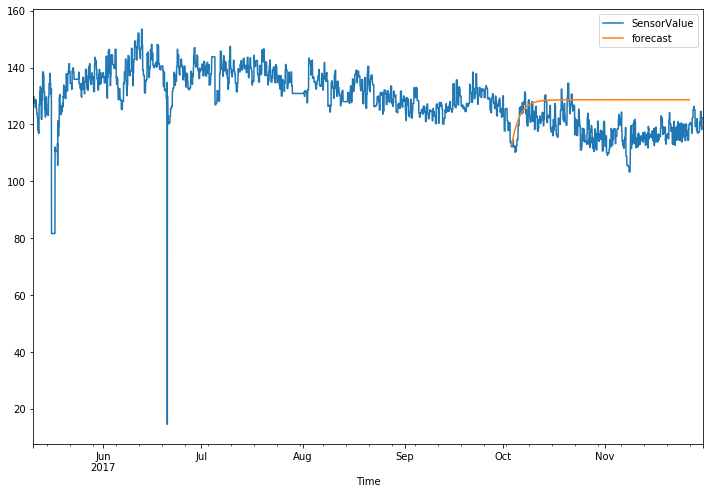

In [27]:
df['forecast']=model_fit.predict(start=3500,end=4800,dynamic=True)
df[['SensorValue','forecast']].plot(figsize=(12,8))

In [113]:
import statsmodels.api as sm

In [204]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


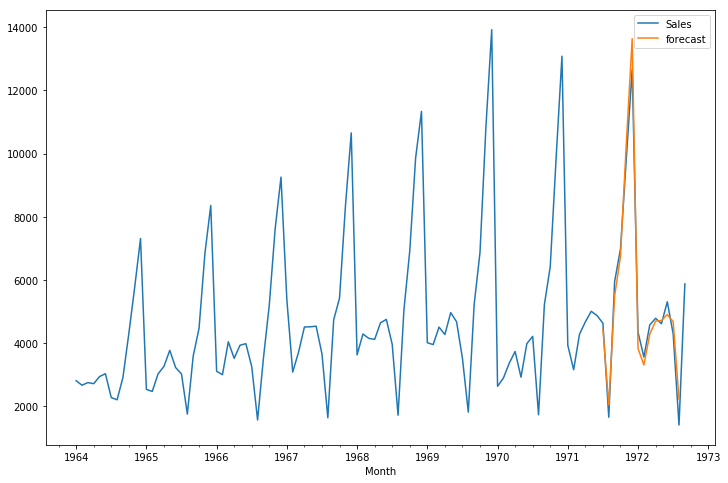

In [205]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [206]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [207]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [208]:
future_datest_df.tail()

,Sales,Sales First Difference,forecast,Seasonal First Difference
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [209]:
future_df=pd.concat([df,future_datest_df])

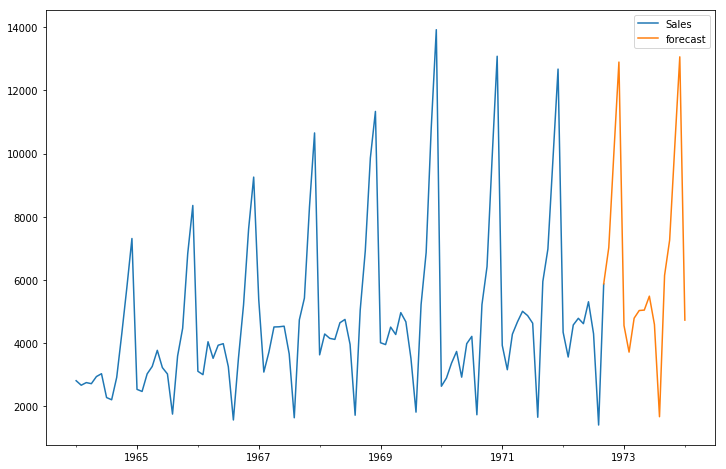

In [201]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 